# Support Vector Regression

### Library Import

In [178]:
import pandas as pd
import numpy as np
import os

from models.utility import load_input, scale_with_minmax, get_dates_from_config, handle_outliers, get_params_from_config, dailydf_to_ts, inverse_transform_minmax, transform_dayofyear, split_dataframe, write_DWH 
from models.svr import SVReg
from models.deeplearner import DeepLearner

from solutil import evaluations

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

### Input Preparation

In [137]:
# Define global variables
str_model = 'inlet2_svr'

In [138]:
# Load Input Parameters
dates = get_dates_from_config(str_model)
df_variables = load_input(str_model=str_model, **dates)

base
base_1d
useday_1d
temp_1h
glob_1h
rain_1h
bf15_1h
schmelz_1h


In [139]:
# Generate day-of-year sin and cos
df_doy = transform_dayofyear(df_variables)

In [140]:
# Handle outliers
df_handled = handle_outliers(df_doy)

Variable base_lag0
Variable base_1d_lag0
Variable temp_1h_lag1
Variable glob_1h_lag1
Variable glob_1h_lag2
Variable rain_1h_lag1
Variable rain_1h_lag2
Variable bf15_1h_lag0
Variable bf15_1h_lag1
Variable bf15_1h_lag2
Variable schmelz_1h_lag1
Variable schmelz_1h_lag2
Variable schmelz_1h_lag3
Variable yearday_sin
Variable yearday_cos


In [141]:
# Scale inputs
df_scaled = scale_with_minmax(df_variables, str_model)

In [142]:
# Initialize SVReg class
svr = SVReg()

In [179]:
df_label, model_names = svr.build_model_input(df=df_scaled, target_var='base_lag0', str_model=str_model, n_offset=0)

In [180]:
df_label

,base_1d_lag0,temp_1h_lag1,glob_1h_lag1,glob_1h_lag2,rain_1h_lag1,rain_1h_lag2,bf15_1h_lag0,bf15_1h_lag1,bf15_1h_lag2,schmelz_1h_lag1,schmelz_1h_lag2,schmelz_1h_lag3,y_model1,y_model2,y_model3,y_model4,y_model5,y_model6
2021-03-02 00:00:00+01:00,0.277317,0.353696,1.0,1.0,0.000000,0.000000,0.689549,0.693051,0.695301,0.054791,0.042149,0.069102,0.254049,0.240845,0.263800,0.326913,0.283895,0.256823
2021-03-02 04:00:00+01:00,0.277317,0.364361,1.0,1.0,0.000000,0.000000,0.686882,0.689549,0.693051,0.056890,0.054791,0.042149,0.240845,0.263800,0.326913,0.283895,0.256823,0.217385
2021-03-02 08:00:00+01:00,0.277317,0.369383,1.0,1.0,0.000000,0.000000,0.687825,0.686882,0.689549,0.069128,0.056890,0.054791,0.263800,0.326913,0.283895,0.256823,0.217385,0.220981
2021-03-02 12:00:00+01:00,0.277317,0.432543,1.0,1.0,0.000000,0.000000,0.679116,0.687825,0.686882,0.087206,0.069128,0.056890,0.326913,0.283895,0.256823,0.217385,0.220981,0.242883
2021-03-02 16:00:00+01:00,0.277317,0.533548,1.0,1.0,0.000000,0.000000,0.672966,0.679116,0.687825,0.099014,0.087206,0.069128,0.283895,0.256823,0.217385,0.220981,0.242883,0.298951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-06 08:00:00+01:00,0.343602,0.708325,1.0,1.0,0.000000,0.000000,0.599398,0.607714,0.607714,0.000000,0.000000,0.000000,0.569311,0.742299,1.000000,1.000000,1.000000,1.000000
2024-07-06 12:00:00+01:00,0.343602,0.816991,1.0,1.0,0.000000,0.000000,0.605038,0.599398,0.607714,0.000000,0.000000,0.000000,0.742299,1.000000,1.000000,1.000000,1.000000,1.000000
2024-07-06 16:00:00+01:00,0.343602,0.730586,1.0,1.0,0.198288,0.000000,0.721113,0.605038,0.599398,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2024-07-06 20:00:00+01:00,0.343602,0.647132,1.0,1.0,0.221522,0.198288,0.776362,0.721113,0.605038,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
# Train Test Split
x_train, x_test, y_train, y_test = split_dataframe(df_label, target_var=model_names)

### Model Initiation & Training

In [145]:
# Model 1
ylabel = 'y_model1'
y_train_i = y_train[ylabel]
y_test_i = y_test[ylabel]

In [146]:
y_train_i

2021-03-02 00:00:00+01:00    0.254049
2021-03-02 04:00:00+01:00    0.240845
2021-03-02 08:00:00+01:00    0.263800
2021-03-02 12:00:00+01:00    0.326913
2021-03-02 16:00:00+01:00    0.283895
                               ...   
2023-07-11 08:00:00+01:00    0.071609
2023-07-11 12:00:00+01:00    0.000000
2023-07-11 16:00:00+01:00    0.034367
2023-07-11 20:00:00+01:00    0.026092
2023-07-12 00:00:00+01:00    0.025378
Name: y_model1, Length: 5053, dtype: float64

#### Grid Search

In [147]:
# Define Grid Search hyperparameters
hyperparams = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'epsilon': [0.01, 0.05, 0.1, 0.2, 0.5]
}

hyperparams_short = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'epsilon': [0.01, 0.05, 0.1, 0.2]
}

hyperparams_fine = {
    'kernel': ['rbf', 'poly'],
    'degree': [2, 3, 4],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.05, 0.1, 0.2]
}

In [148]:
# Parameterize Grid Search
svreg = SVR()
grid_search = GridSearchCV(svreg, param_grid=hyperparams_short, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

##### Model 1

In [149]:
# Run Grid Search
#grid_results = grid_search.fit(x_train, y_train_i)

In [150]:
# Extract Best Hyperparameters
#best_params = grid_results.best_params_
#best_score = grid_results.best_score_

#print(f"Best parameter combination: {best_params} with score {best_score}")

Best parameter combination: {'C': 10, 'epsilon': 0.01, 'kernel': 'poly'} with score -0.008726125428550028

In [151]:
#df_gridscore = pd.DataFrame(grid_results.cv_results_)
#df_gridscore.sort_values(by='rank_test_score')

In [152]:
#grid_search_fine = GridSearchCV(svreg, param_grid=hyperparams_fine, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
#grid_results_fine = grid_search_fine.fit(x_train, y_train_i)

In [153]:
#pd.DataFrame(grid_results_fine.cv_results_).sort_values(by='rank_test_score')

##### Model 2

In [154]:
# Run Grid Search
#grid_results_2 = grid_search.fit(x_train, y_train['y_model2'])

In [155]:
# Extract Best Hyperparameters
#best_params_2 = grid_results_2.best_params_
#best_score_2 = grid_results_2.best_score_

#print(f"Best parameter combination: {best_params_2} with score {best_score_2}")

Best parameter combination: {'C': 10, 'epsilon': 0.01, 'kernel': 'poly'} with score -0.013799575784727269

##### Model 3

In [156]:
# Run Grid Search
#grid_results_3 = grid_search.fit(x_train, y_train['y_model3'])

In [157]:
# Extract Best Hyperparameters
#best_params_3 = grid_results_3.best_params_
#best_score_3 = grid_results_3.best_score_

#print(f"Best parameter combination: {best_params_3} with score {best_score_3}")

Best parameter combination: {'C': 1, 'epsilon': 0.1, 'kernel': 'poly'} with score -0.020381108206440613

##### Model 4

In [158]:
# Run Grid Search
#grid_results_4 = grid_search.fit(x_train, y_train['y_model4'])

In [159]:
# Extract Best Hyperparameters
#best_params_4 = grid_results_4.best_params_
#best_score_4 = grid_results_4.best_score_

#print(f"Best parameter combination: {best_params_4} with score {best_score_4}")

Best parameter combination: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'} with score -0.02638275599395644

##### Model 5

In [160]:
# Run Grid Search
#grid_results_5 = grid_search.fit(x_train, y_train['y_model5'])

In [161]:
# Extract Best Hyperparameters
#best_params_5 = grid_results_5.best_params_
#best_score_5 = grid_results_5.best_score_

#print(f"Best parameter combination: {best_params_5} with score {best_score_5}")

Best parameter combination: {'C': 10, 'epsilon': 0.1, 'kernel': 'poly'} with score -0.03230184098204269



##### Model 6

In [162]:
# Run Grid Search
#grid_results_6 = grid_search.fit(x_train, y_train['y_model6'])

In [163]:
# Extract Best Hyperparameters
#best_params_6 = grid_results_6.best_params_
#best_score_6 = grid_results_6.best_score_

#print(f"Best parameter combination: {best_params_6} with score {best_score_6}")

Best parameter combination: {'C': 1, 'epsilon': 0.1, 'kernel': 'poly'} with score -0.03852376506403533

#### Optimum Model Initiation

In [164]:
# Generate and Parameterize Models
models = svr.build_svr(str_model=str_model)

In [165]:
# Train models
trained_models = svr.train_svr(svr_dict=models, x_train=x_train, y_train=y_train)

In [166]:
# Predict Time Series
y_pred = svr.predict_svr(trained_svr=trained_models, x_test=x_test, str_model=str_model)

In [167]:
# Rescale Predictions
y_pred_rescaled = inverse_transform_minmax(df_scaled=y_pred, str_model=str_model, attributes=['base_lag0']) # base_lag0 as foundation for y_model1, etc.
y_test_rescaled = inverse_transform_minmax(df_scaled=y_test['y_model1'], str_model=str_model, attributes=['base_lag0'])

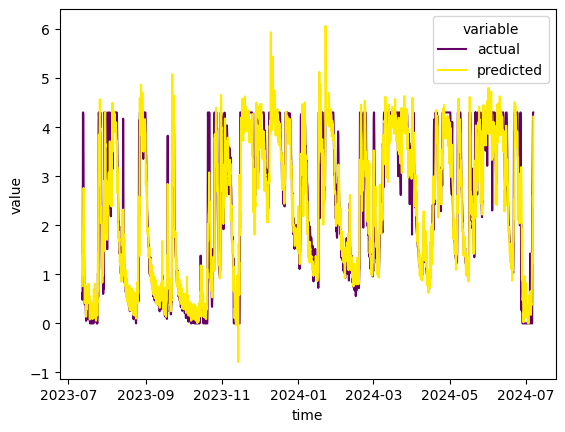

In [168]:
# Comparison Plot
fig = evaluations.get_act_vs_pred_plot(y_test_rescaled, y_pred_rescaled)

In [169]:
metrics = evaluations.get_eval_metrics(y_test_rescaled, y_pred_rescaled)
metrics

{'mae': 0.34824238827266496,
 'mse': 0.2644281217717006,
 'rmse': 0.514225749813932,
 'mape': 87764936950815.05,
 'non-na%': 1.0,
 'n_actual_obs': 2166,
 'n_pred_nas': 0}

### Save Model Output for Ensemble

In [170]:
data_dict = {'ypred_svr': y_pred_rescaled,
            'ytest_svr': y_test_rescaled}

df_data = pd.DataFrame(data_dict)

#df_data.to_csv('experiments/stacking_data/ypred_svr.csv')

### Save Model Output to DWH

In [171]:
# Interpolate to 1h frequency
ts_ypred_1h = y_pred_rescaled.resample('1h').interpolate()
df_ypred_1h = ts_ypred_1h.to_frame()

In [172]:
df_ypred_1h

,0
2023-07-12 04:00:00+01:00,0.761309
2023-07-12 05:00:00+01:00,0.925616
2023-07-12 06:00:00+01:00,1.089922
2023-07-12 07:00:00+01:00,1.254229
2023-07-12 08:00:00+01:00,1.418535
...,...
2024-07-06 20:00:00+01:00,2.382033
2024-07-06 21:00:00+01:00,2.839845
2024-07-06 22:00:00+01:00,3.297656
2024-07-06 23:00:00+01:00,3.755467


In [173]:
# Create ts name string
inlet_n = str_model.split('_')[0].capitalize()
str_algo = str_model.split('_')[1].upper()
str_pred = 'Prediction'
ts_name = '_'.join([inlet_n, str_pred, str_algo])

In [174]:
# Save as csv
'''
write_DWH(str_path=os.path.join(r'\\srvedm11', 'Import', 'Messdaten', 'EPAG_Energie', 'DWH_EX_60'),
          str_tsname=ts_name,
          str_property='Python',
          str_unit='m/3',
          df_timeseries = df_ypred_1h
          )
'''

"\nwrite_DWH(str_path=os.path.join(r'\\srvedm11', 'Import', 'Messdaten', 'EPAG_Energie', 'DWH_EX_60'),\n          str_tsname=ts_name,\n          str_property='Python',\n          str_unit='m/3',\n          df_timeseries = df_ypred_1h\n          )\n"